# Hierarchical Clustering
###### Work on Linearly Separable dataset

### Two Types
#### 1. Agglomertive Clustring        2. Divisive Clustring


### 1. Agglomertive Clustring

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
dataset =pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Iris-Hierarchical Clustering dataset.csv')
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


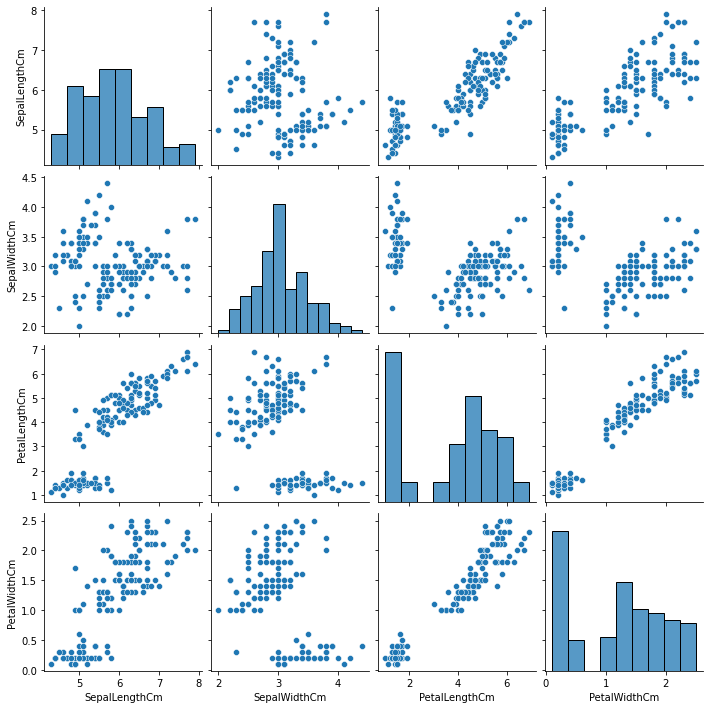

In [11]:
sns.pairplot(data=dataset)
plt.show()

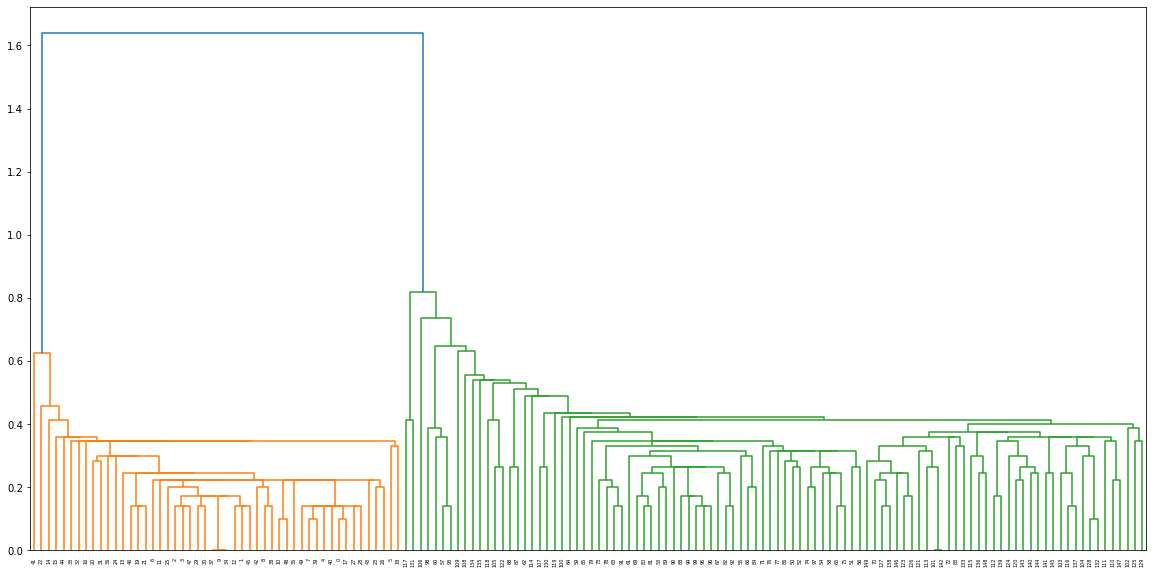

In [15]:
import scipy.cluster.hierarchy as sc

# Compute the linkage matrix
linkage_matrix = sc.linkage(dataset, method='single', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(20,10))
sc.dendrogram(linkage_matrix)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
Agglo_clus =AgglomerativeClustering(n_clusters=2,linkage='single')
dataset['Predict'] =Agglo_clus.fit_predict(dataset)

In [17]:
dataset.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


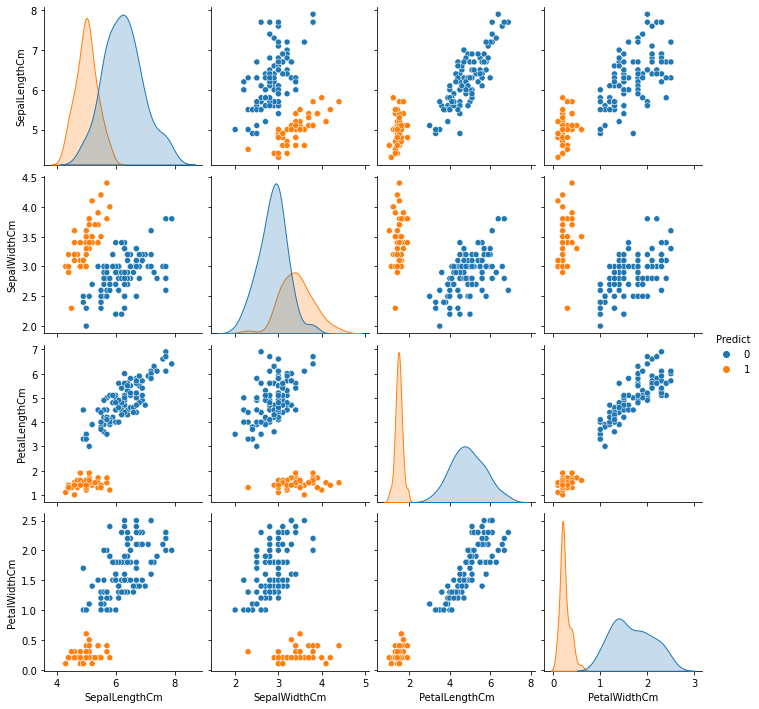

In [18]:
sns.pairplot(data=dataset ,hue='Predict')
plt.show()

### 2. Divisive Clustring

Step-by-Step Code for Divisive Clustering (using K-Means + Manhattan Distance)
✔️ Steps:
1️⃣ Assume initial K = 2 (binary split for simplicity).
2️⃣ Calculate distance using Manhattan distance (L1 norm).
3️⃣ Apply K-Means to split the cluster.
4️⃣ Recursively split until a stopping criterion is met (like max depth or min cluster size).

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load Iris dataset
iris = load_iris()

# Convert to DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display first few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


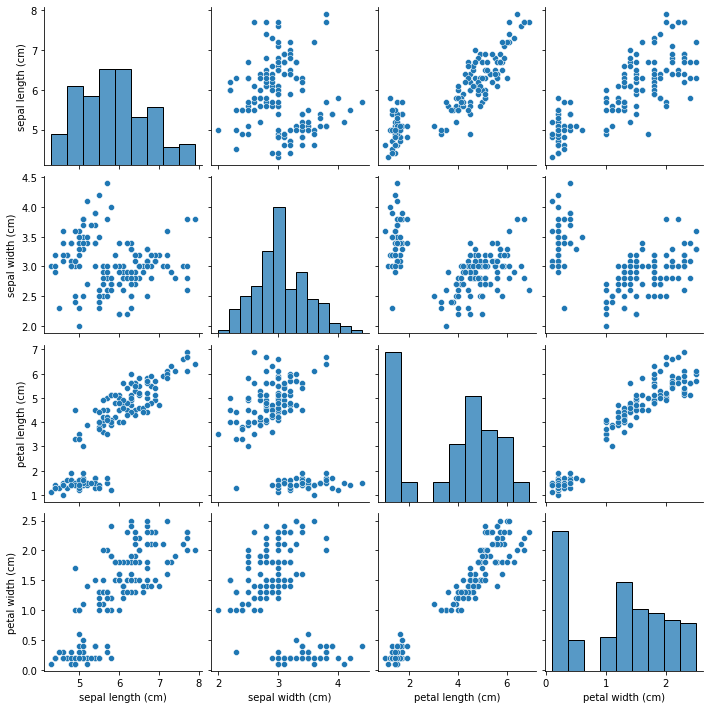

In [20]:
sns.pairplot(data=data)
plt.show()

In [16]:
# Divisive Clustering Function using KMeans with Manhattan Distance
def divisive_clustering(data, max_clusters=4):
    clusters = {0: data.copy()}  # Start with one big cluster
    cluster_labels = pd.Series(0, index=data.index)  # Initial label 0
    next_label = 1

    while len(clusters) < max_clusters:
        # Find the largest cluster to split
        sizes = {k: len(v) for k, v in clusters.items()}
        current_cluster = max(sizes, key=sizes.get)

        cluster_data = clusters[current_cluster]

        # Compute Manhattan distance matrix (optional, for understanding)
        distance_matrix = pairwise_distances(cluster_data, metric='manhattan')

        # Apply KMeans with K=2 to split
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        kmeans.fit(cluster_data)

        labels = kmeans.labels_

        # Create two new clusters based on labels
        cluster_data_0 = cluster_data[labels == 0]
        cluster_data_1 = cluster_data[labels == 1]

        clusters[next_label] = cluster_data_0
        clusters[next_label + 1] = cluster_data_1

        # Update overall cluster labels
        cluster_labels.loc[cluster_data_0.index] = next_label
        cluster_labels.loc[cluster_data_1.index] = next_label + 1

        # Remove the split cluster
        del clusters[current_cluster]

        next_label += 2

    return cluster_labels


In [17]:
# Apply divisive clustering on the dataset
labels = divisive_clustering(data, max_clusters=4)

# Display cluster labels
labels.head(10)


c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
dtype: int64

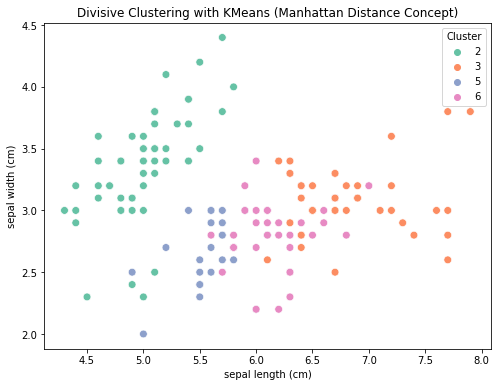

In [18]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data.iloc[:, 0],
    y=data.iloc[:, 1],
    hue=labels,
    palette="Set2",
    s=60
)
plt.title('Divisive Clustering with KMeans (Manhattan Distance Concept)')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.legend(title="Cluster")
plt.show()
